In this code we will use Lightkurve package to rule out false positives based on the following tests

* Background Flux
* Pixel Level Light Curve Plot
* In Out Transit Flux
* Centriod Position 

Check these YouTube videos to understand the basics: https://youtube.com/playlist?list=PLpTcgCRPTgRnDHTrJ48cYx8zvpJhDfAx_ <br />
And these code in GitHub: https://github.com/noraeisner/PH_Coffee_Chat/tree/main/False%20Positive

Here I used the same model and code provided in above GitHub link and did some minor changes so that process can be autometed. 

** This codes were initially made by `Nora Eisner`

# Importing Libraries

In [1]:
import matplotlib.pyplot as plt; plt.rcParams["figure.dpi"] = 150
import lightkurve as lk
import numpy as np
import os

# Defined Functions to check for False Positives
import In_Out_Transit_Flux as iotf
import Pixel_Level_LC as pll
import Centroid_Position as cp

# For TLS (Transit Least Square)
import astropy
import numpy
from astropy.io import fits
from astropy.stats import sigma_clip
from transitleastsquares import (transitleastsquares, cleaned_array, catalog_info, transit_mask)

# User Input

### Data Files

Understand the file name

Ex. 

Target Pixel File: tess2021146024351-s0039-0000000260985861-0210-s_tp.fits <br />
Light Curve File: tess2021146024351-s0039-0000000260985861-0210-s_lc.fits
    
* The file name contains `_tp.fits` at the end is Target Pixel file, and contains `_lc.fits` is Light Curve file.  
* `s0039` suggests that target is of 39th observational sector of TESS
* `0000000260985861` is TIC ID

In [2]:
# Provide a Full Path to the Light Curve & Target Pixel File
# Make sure that both files are from same sectors

# Define the TOI ID of a Target
TOI_ID = '672' # Only number i.e., if the target is TOI 111 then only write 111
Sector = '09'

# Provide a Path to the .fits files

os.chdir('E:/MAST TESS Data/TOI '+TOI_ID)
print(os.getcwd())

Target_Pixel_File = "tess2019058134432-s0009-0000000151825527-0139-s_tp.fits"
Light_Curve_File  = "tess2019058134432-s0009-0000000151825527-0139-s_lc.fits"

hdu = fits.open(Light_Curve_File) # Read the light curve file

tpf = lk.read(Target_Pixel_File) 
lc = lk.read(Light_Curve_File)

os.chdir('C:/Users/computer/Exoplanets_Programing/FPP Calculator/False Positive Testing')
print(os.getcwd())

E:\MAST TESS Data\TOI 672
C:\Users\computer\Exoplanets_Programing\FPP Calculator\False Positive Testing


### Now you can run each cell one by one. No need to make any changes.

# Read Files

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

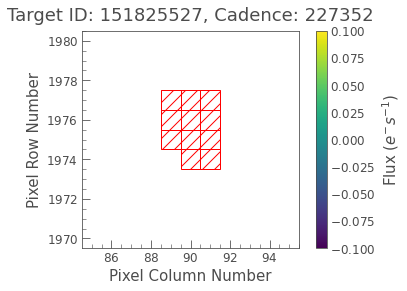

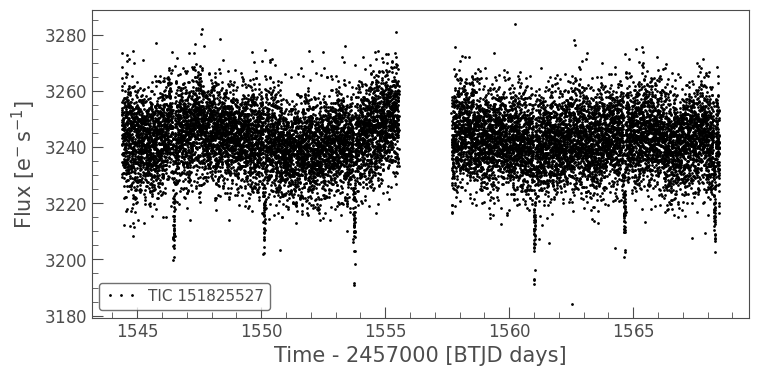

In [3]:
tpf.plot(aperture_mask='pipeline')
lc.plot(linewidth = 0, marker = '.', color = 'black')

# Transit Least Squares (TLS)

Running TLS algorithm to find out the approximate orbital period and transit time at all the transit events. These transit times will be useful to check background flux, in-out transit flux, pixel level testing and centroid testing.

In [15]:
# Extracting the data
time = hdu[1].data['TIME']
flux = hdu[1].data['PDCSAP_FLUX']  

time, flux = cleaned_array(time, flux) # remove invalid values such as nan, inf, non, negative
flux = flux / numpy.median(flux) # Normalising the light curve

# Run the model to the data
model = transitleastsquares(time, flux)
results = model.power(n_transits_min = 1)


  0%|          | 0/2407 periods | 00:00<?

Transit Least Squares TLS 1.0.31 (22 Nov 2021)
Creating model cache for 42 durations
Searching 15772 data points, 2407 periods from 0.601 to 24.103 days
Using all 4 CPU threads



  0%|          | 1/2407 periods | 00:10<7:11:11
  0%|          | 3/2407 periods | 00:10<1:53:15
  0%|          | 5/2407 periods | 00:11<56:38  
  0%|          | 7/2407 periods | 00:11<33:45
  0%|          | 9/2407 periods | 00:11<22:37
  0%|          | 12/2407 periods | 00:11<13:25
  1%|          | 15/2407 periods | 00:11<09:31
  1%|          | 19/2407 periods | 00:11<06:08
  1%|          | 23/2407 periods | 00:12<04:18
  1%|          | 26/2407 periods | 00:12<03:27
  1%|          | 30/2407 periods | 00:12<02:48
  1%|▏         | 34/2407 periods | 00:12<02:29
  2%|▏         | 38/2407 periods | 00:12<02:17
  2%|▏         | 41/2407 periods | 00:12<02:04
  2%|▏         | 44/2407 periods | 00:12<02:01
  2%|▏         | 47/2407 periods | 00:13<01:57
  2%|▏         | 50/2407 periods | 00:13<01:55
  2%|▏         | 53/2407 periods | 00:13<01:47
  2%|▏         | 56/2407 periods | 00:13<01:43
  2%|▏         | 59/2407 periods | 00:13<01:42
  3%|▎         | 62/2407 periods | 00:13<01:55
  3%|▎     

 21%|██▏       | 514/2407 periods | 00:34<01:16
 22%|██▏       | 518/2407 periods | 00:35<01:11
 22%|██▏       | 521/2407 periods | 00:35<01:14
 22%|██▏       | 524/2407 periods | 00:35<01:20
 22%|██▏       | 527/2407 periods | 00:35<01:25
 22%|██▏       | 531/2407 periods | 00:35<01:13
 22%|██▏       | 534/2407 periods | 00:35<01:16
 22%|██▏       | 538/2407 periods | 00:35<01:13
 23%|██▎       | 542/2407 periods | 00:36<01:21
 23%|██▎       | 546/2407 periods | 00:36<01:18
 23%|██▎       | 550/2407 periods | 00:36<01:16
 23%|██▎       | 553/2407 periods | 00:36<01:14
 23%|██▎       | 556/2407 periods | 00:36<01:15
 23%|██▎       | 559/2407 periods | 00:36<01:17
 23%|██▎       | 562/2407 periods | 00:36<01:15
 23%|██▎       | 565/2407 periods | 00:37<01:14
 24%|██▎       | 568/2407 periods | 00:37<01:13
 24%|██▎       | 571/2407 periods | 00:37<01:19
 24%|██▍       | 575/2407 periods | 00:37<01:16
 24%|██▍       | 578/2407 periods | 00:37<01:16
 24%|██▍       | 581/2407 periods | 00:3

 44%|████▎     | 1048/2407 periods | 00:58<00:56
 44%|████▎     | 1052/2407 periods | 00:58<00:52
 44%|████▍     | 1055/2407 periods | 00:58<00:54
 44%|████▍     | 1058/2407 periods | 00:58<00:55
 44%|████▍     | 1061/2407 periods | 00:58<00:56
 44%|████▍     | 1064/2407 periods | 00:58<01:02
 44%|████▍     | 1067/2407 periods | 00:59<01:02
 44%|████▍     | 1070/2407 periods | 00:59<01:01
 45%|████▍     | 1073/2407 periods | 00:59<01:07
 45%|████▍     | 1076/2407 periods | 00:59<01:00
 45%|████▍     | 1079/2407 periods | 00:59<01:00
 45%|████▍     | 1082/2407 periods | 00:59<01:01
 45%|████▌     | 1086/2407 periods | 00:59<00:55
 45%|████▌     | 1089/2407 periods | 01:00<00:56
 45%|████▌     | 1092/2407 periods | 01:00<00:54
 46%|████▌     | 1096/2407 periods | 01:00<00:50
 46%|████▌     | 1099/2407 periods | 01:00<00:56
 46%|████▌     | 1102/2407 periods | 01:00<00:57
 46%|████▌     | 1105/2407 periods | 01:00<00:56
 46%|████▌     | 1109/2407 periods | 01:00<00:50
 46%|████▌     | 111

 64%|██████▍   | 1543/2407 periods | 01:21<00:42
 64%|██████▍   | 1546/2407 periods | 01:21<00:42
 64%|██████▍   | 1549/2407 periods | 01:22<00:43
 64%|██████▍   | 1552/2407 periods | 01:22<00:43
 65%|██████▍   | 1555/2407 periods | 01:22<00:39
 65%|██████▍   | 1558/2407 periods | 01:22<00:39
 65%|██████▍   | 1561/2407 periods | 01:22<00:39
 65%|██████▍   | 1564/2407 periods | 01:22<00:38
 65%|██████▌   | 1568/2407 periods | 01:22<00:36
 65%|██████▌   | 1571/2407 periods | 01:22<00:34
 65%|██████▌   | 1574/2407 periods | 01:23<00:40
 66%|██████▌   | 1577/2407 periods | 01:23<00:38
 66%|██████▌   | 1580/2407 periods | 01:23<00:40
 66%|██████▌   | 1583/2407 periods | 01:23<00:38
 66%|██████▌   | 1586/2407 periods | 01:23<00:41
 66%|██████▌   | 1589/2407 periods | 01:23<00:38
 66%|██████▌   | 1592/2407 periods | 01:24<00:39
 66%|██████▋   | 1595/2407 periods | 01:24<00:36
 66%|██████▋   | 1598/2407 periods | 01:24<00:34
 67%|██████▋   | 1601/2407 periods | 01:24<00:40
 67%|██████▋   | 160

 85%|████████▍ | 2040/2407 periods | 01:44<00:17
 85%|████████▍ | 2043/2407 periods | 01:45<00:17
 85%|████████▌ | 2046/2407 periods | 01:45<00:19
 85%|████████▌ | 2050/2407 periods | 01:45<00:16
 85%|████████▌ | 2053/2407 periods | 01:45<00:16
 85%|████████▌ | 2056/2407 periods | 01:45<00:15
 86%|████████▌ | 2060/2407 periods | 01:45<00:14
 86%|████████▌ | 2063/2407 periods | 01:45<00:14
 86%|████████▌ | 2066/2407 periods | 01:46<00:16
 86%|████████▌ | 2069/2407 periods | 01:46<00:17
 86%|████████▌ | 2072/2407 periods | 01:46<00:16
 86%|████████▌ | 2075/2407 periods | 01:46<00:15
 86%|████████▋ | 2078/2407 periods | 01:46<00:14
 86%|████████▋ | 2081/2407 periods | 01:46<00:15
 87%|████████▋ | 2084/2407 periods | 01:47<00:16
 87%|████████▋ | 2087/2407 periods | 01:47<00:16
 87%|████████▋ | 2090/2407 periods | 01:47<00:14
 87%|████████▋ | 2093/2407 periods | 01:47<00:16
 87%|████████▋ | 2097/2407 periods | 01:47<00:15
 87%|████████▋ | 2101/2407 periods | 01:47<00:14
 87%|████████▋ | 210

Searching for best T0 for period 3.63314 days


## Plot Periodogram, Model and Phase Folded Light Curve

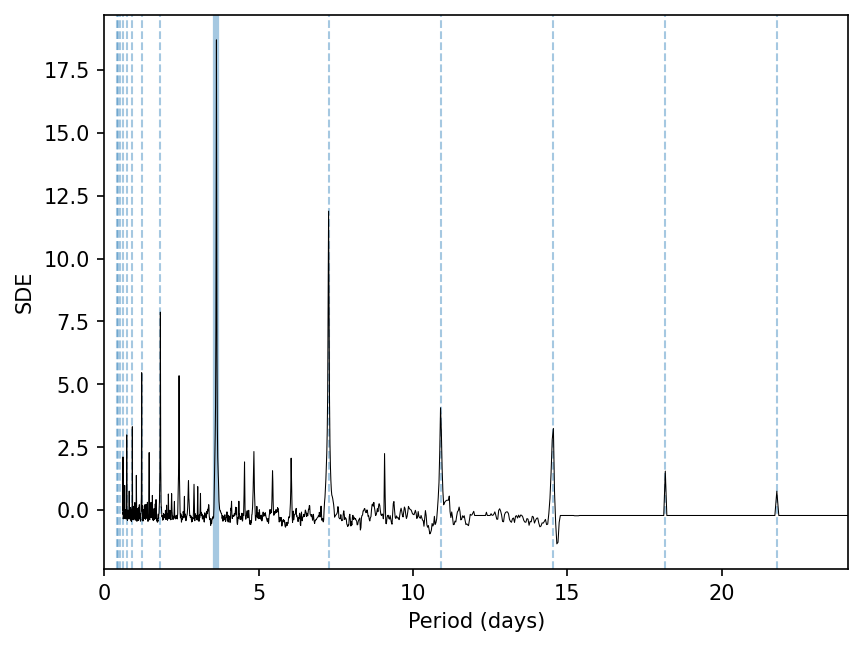

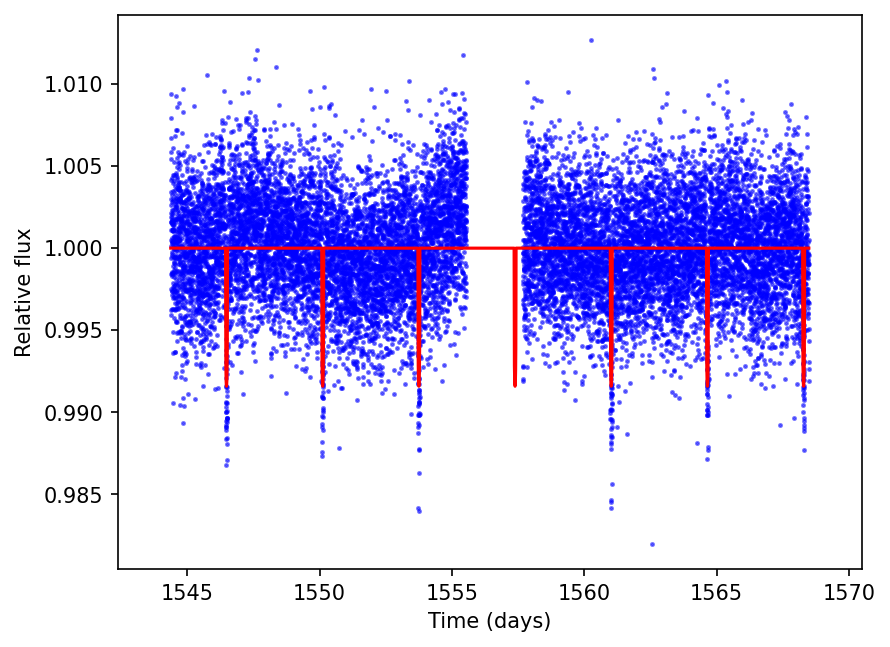

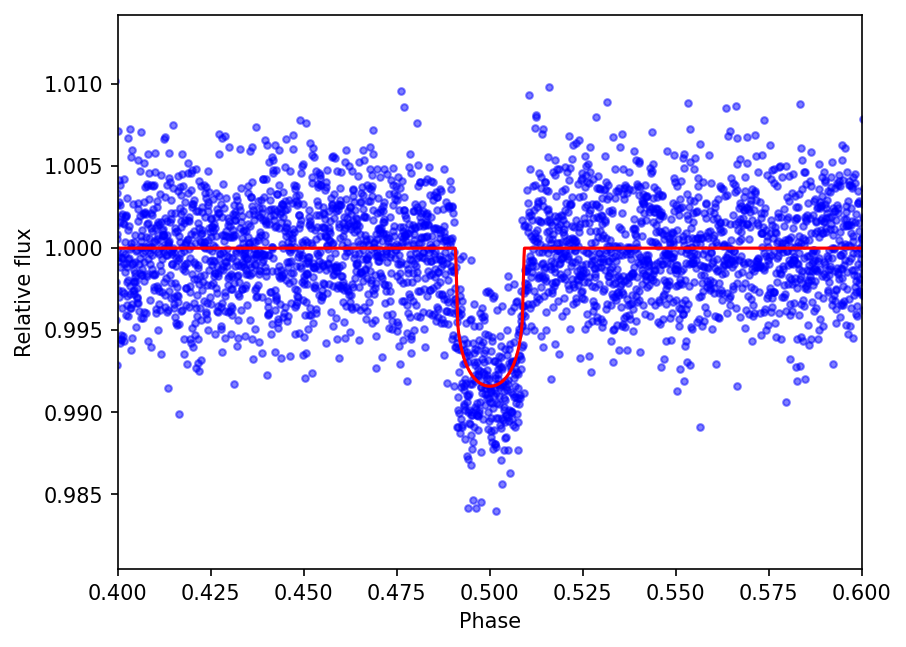

In [16]:
plt.figure()
ax = plt.gca()
ax.axvline(results.period, alpha=0.4, lw=3)
plt.xlim(numpy.min(results.periods), numpy.max(results.periods))

for n in range(2, 10):
    ax.axvline(n*results.period, alpha=0.4, lw=1, linestyle="dashed")
    ax.axvline(results.period / n, alpha=0.4, lw=1, linestyle="dashed")

# Periodogram
plt.ylabel(r'SDE')
plt.xlabel('Period (days)')
plt.plot(results.periods, results.power, color='black', lw=0.5)
plt.xlim(0, max(results.periods));

# Transit Light Curve
plt.figure()
in_transit = transit_mask(time, results.period, results.duration, results.T0)
plt.scatter(time, flux, color='blue', alpha=0.5, s=2, zorder=1)
plt.plot(results.model_lightcurve_time, results.model_lightcurve_model, color='red', zorder=1)
plt.xlim(time.min() - 2, time.max() + 2)
plt.xlabel('Time (days)')
plt.ylabel('Relative flux');

# Phase Folded Transit Light Curve
plt.figure()
plt.plot(results.model_folded_phase, results.model_folded_model, color='red', zorder = 1)
plt.scatter(results.folded_phase, results.folded_y, color='blue', s=10, alpha=0.5, zorder=0)
plt.xlim(0.4, 0.6)
plt.xlabel('Phase')
plt.ylabel('Relative flux');

## Output Values from TLS

In [17]:
print('Period (P) = ', format(results.period, '.5f'), 'd') 
print('Epoch Time (T0) = ', results.T0)
print('Transit duration (TD) = ', format(results.duration, '.5f'), 'd')
print('Signal to Noise Ratio (SNR) = ', results.snr)
print('False Alarm Probability (FAP) = ', results.FAP)
print('SDE (1 - FAP) = ', 1 - results.FAP)
print(' ')
print('All Transit times in time series (Model) = ')
print(['{0:0.5f}'.format(i) for i in results.transit_times])

for i in range(np.size(results.per_transit_count)):
    if results.per_transit_count[i] == 0:
        results.transit_times.pop(i)

print(' ')
print("If no transits available in data then respective transit time will be removed from the array")
print('Transit times in time series (Data) = ')
print(['{0:0.5f}'.format(i) for i in results.transit_times])
        
transit_time = results.transit_times # Providing all the transit times generated from TLS

Period (P) =  3.63314 d
Epoch Time (T0) =  1546.481957828428
Transit duration (TD) =  0.06465 d
Signal to Noise Ratio (SNR) =  43.1067998634695
False Alarm Probability (FAP) =  8.0032e-05
SDE (1 - FAP) =  0.999919968
 
All Transit times in time series (Model) = 
['1546.48196', '1550.11510', '1553.74824', '1557.38138', '1561.01452', '1564.64765', '1568.28079']
 
If no transits available in data then respective transit time will be removed from the array
Transit times in time series (Data) = 
['1546.48196', '1550.11510', '1553.74824', '1561.01452', '1564.64765', '1568.28079']


# Create Directory to save Output

In [18]:
# Print Current Path
print("Current Path")
print(os.getcwd())
print()

if os.path.isdir('Output/TOI '+TOI_ID) == False:
    print("Created new Directory (TOI)")
    os.mkdir('Output/TOI '+TOI_ID)
    os.chdir('Output/TOI '+TOI_ID)
    print(os.getcwd())
    print()
else:
    print("TOI Directoroy is already available, changed path to that Directory.")
    os.chdir('Output/TOI '+TOI_ID)
    print(os.getcwd())
    print()

    
# Create directory based on sector
if os.path.isdir('Sector '+Sector) == False:
    print("Created new Directory (Sector)")
    os.mkdir('Sector '+Sector)
    os.chdir('Sector '+Sector)
    print(os.getcwd())
    print()
else:
    print("Sector Directoroy is already available, changed path to that Directory.")
    os.chdir('Sector '+Sector)
    print(os.getcwd())
    print()

print("New Path")
print(os.getcwd())

Current Path
C:\Users\computer\Exoplanets_Programing\FPP Calculator\False Positive Testing

TOI Directoroy is already available, changed path to that Directory.
C:\Users\computer\Exoplanets_Programing\FPP Calculator\False Positive Testing\Output\TOI 672

Sector Directoroy is already available, changed path to that Directory.
C:\Users\computer\Exoplanets_Programing\FPP Calculator\False Positive Testing\Output\TOI 672\Sector 09

New Path
C:\Users\computer\Exoplanets_Programing\FPP Calculator\False Positive Testing\Output\TOI 672\Sector 09


# TEST 1: Background Flux

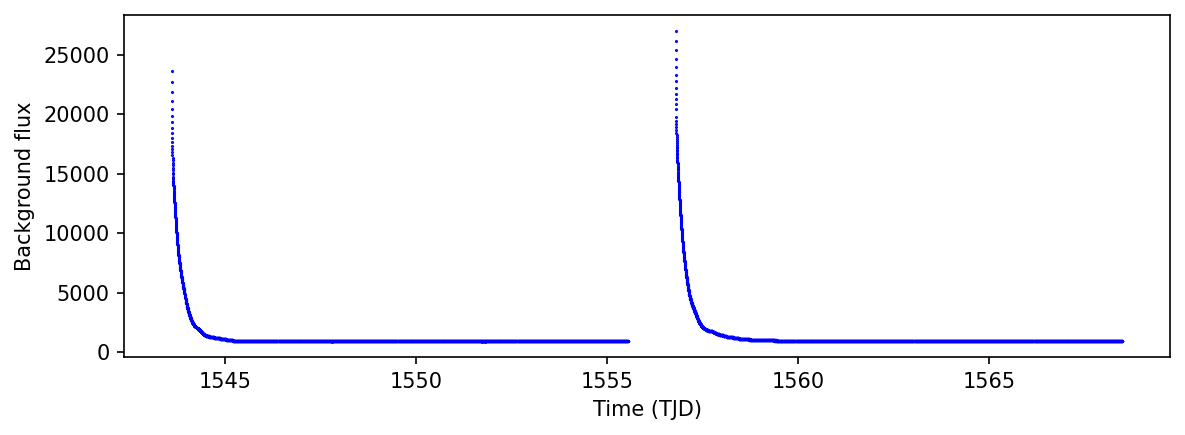

In [19]:
# set up the plotting region
fig, ax = plt.subplots(figsize = (8,3))

# plot the time vs the backrgound flux (see above cell)
plt.plot(lc.time.value, lc.sap_bkg.value, color = 'blue', lw = 0, marker = '.', ms = 1)

plt.ylabel("Background flux") # label the axes
plt.xlabel("Time (TJD)")
plt.tight_layout()
plt.show()

fig.savefig(os.path.join('', 'TOI_'+TOI_ID+'_S_'+Sector+'_BG_.jpeg'), format='jpeg', dpi=600, bbox_inches = 'tight')

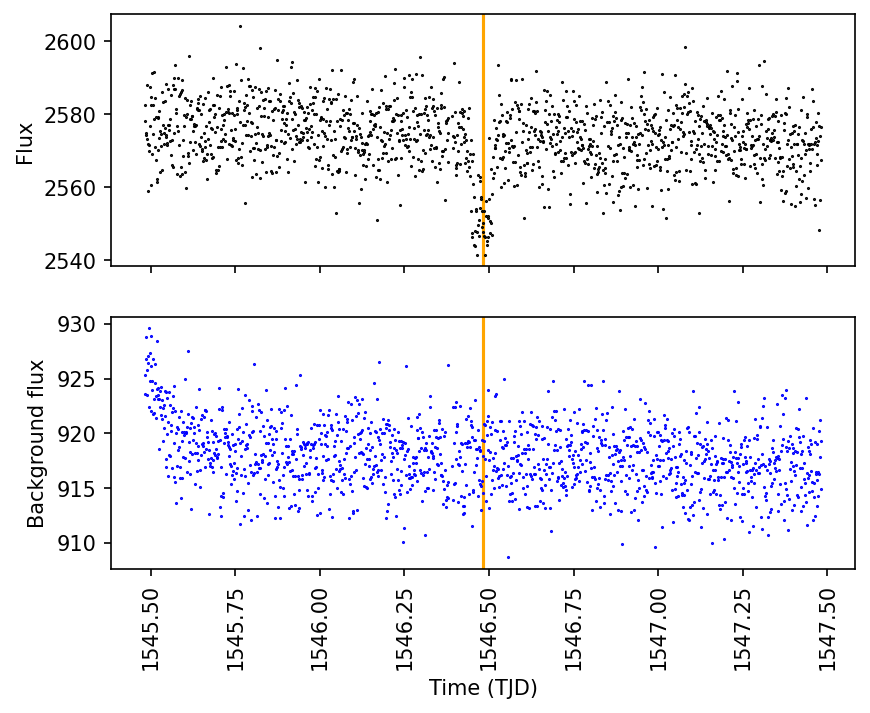

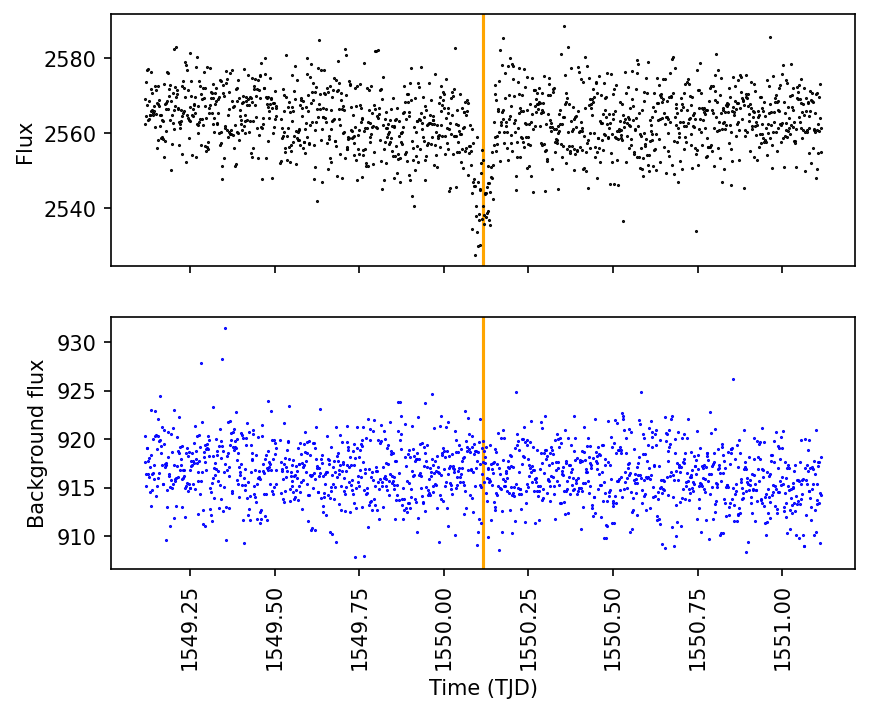

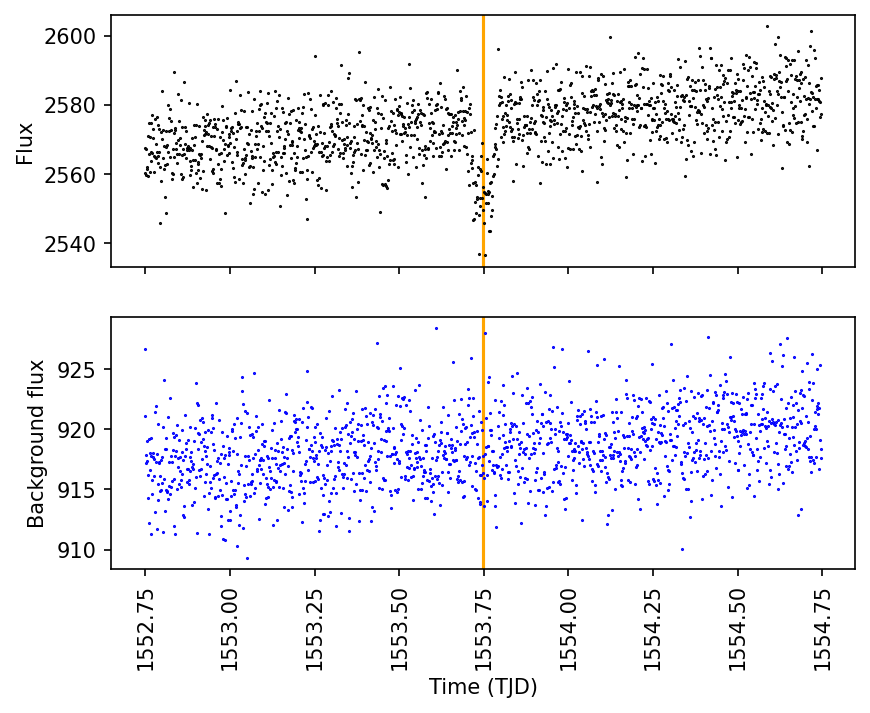

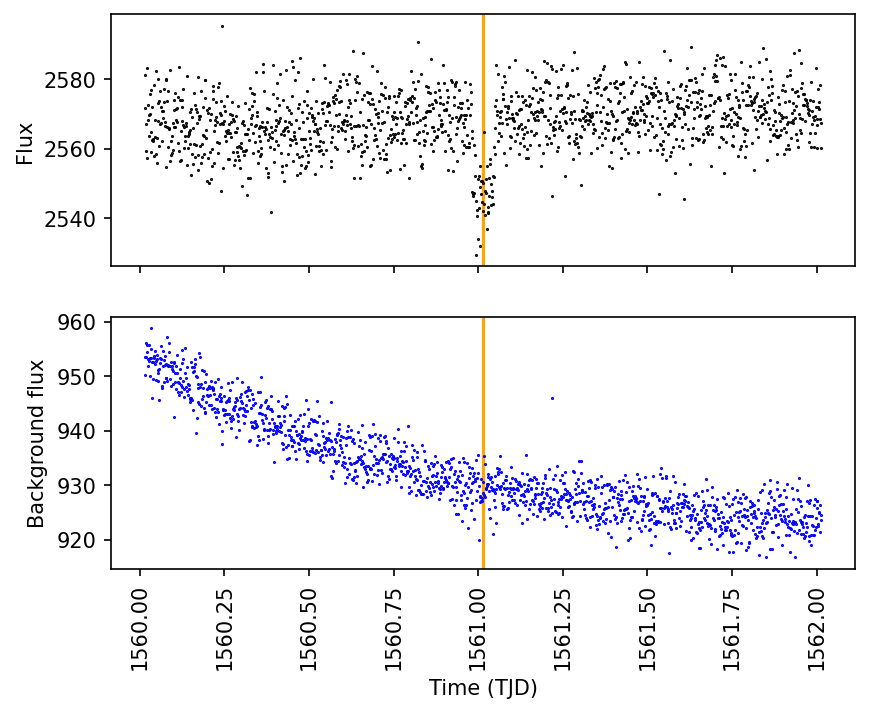

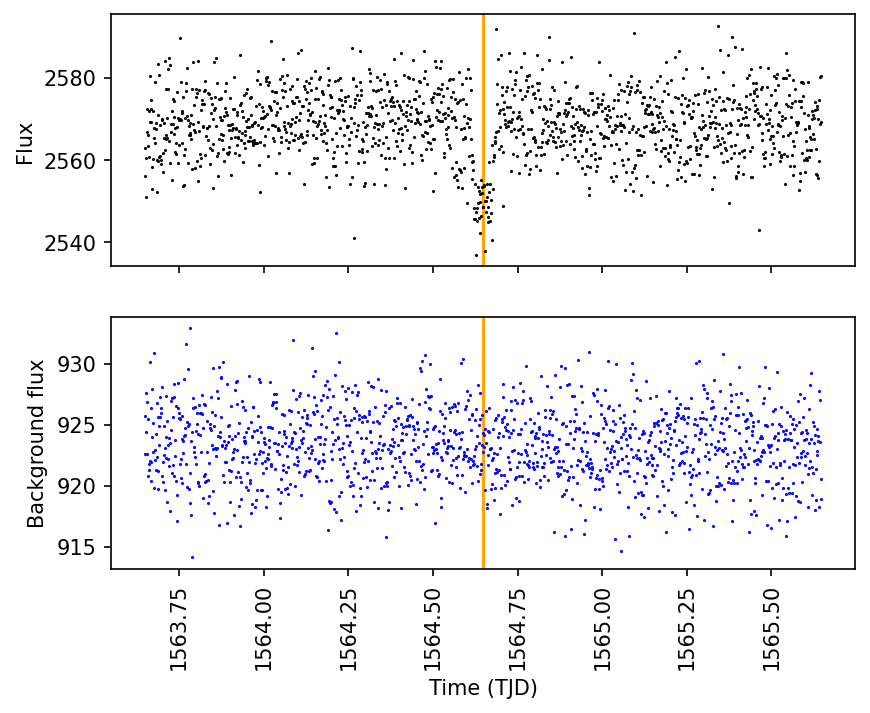

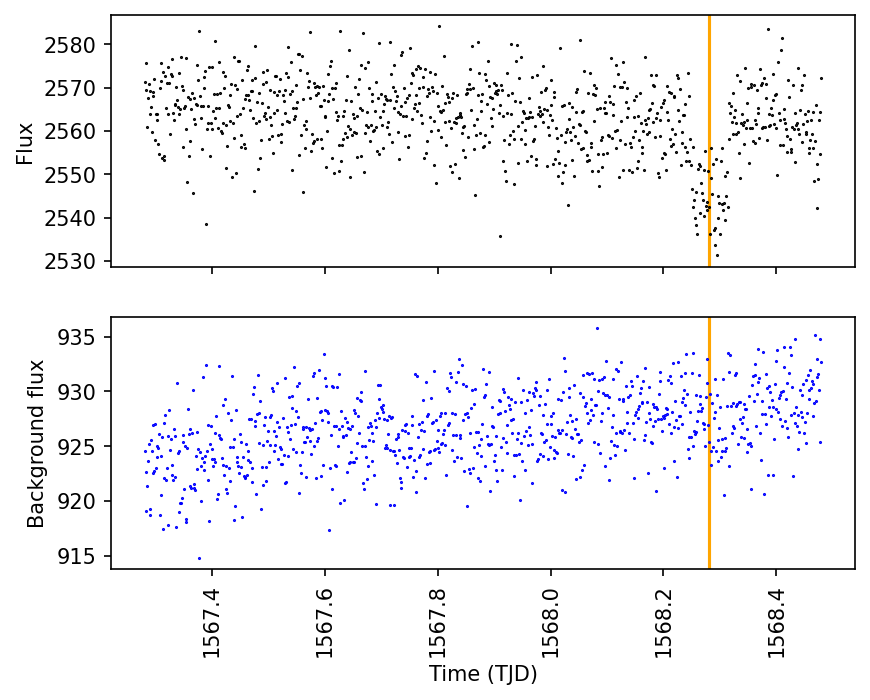

In [20]:
for i in range(np.size(transit_time)):
    # define a plotting region with two parts
    fig, ax = plt.subplots(2,1, sharex = True)

    transit_mask = (lc.time.value > transit_time[i] - 1) & (lc.time.value < transit_time[i] + 1)
    
    #plot the flux on the first axes and the background flux on the second
    #crop both data sets using the mask that we defined in the cell above
    ax[0].plot(lc.time.value[transit_mask], lc.sap_flux.value[transit_mask], color = 'k', lw = 0, marker = '.', ms = 1)
    ax[1].plot(lc.time.value[transit_mask], lc.sap_bkg.value[transit_mask], color = 'blue', lw = 0, marker = '.', ms = 1)

    #plot a line at the time of the transit event on both plots
    ax[0].axvline(transit_time[i], color = 'orange', zorder = -1)
    ax[1].axvline(transit_time[i], color = 'orange', zorder = -1)

    ax[0].set_ylabel("Flux")
    ax[1].set_ylabel("Background flux")
    ax[1].set_xlabel("Time (TJD)")
    
    plt.xticks(rotation = 90)
    plt.show()
    
    fig.savefig(os.path.join('', 'TOI_'+TOI_ID+'_S_'+Sector+'_BG_'+str(i)+'.jpeg'), format='jpeg',
                dpi=600, bbox_inches = 'tight')

# TEST 2: Pixel Level Light Curve Plot

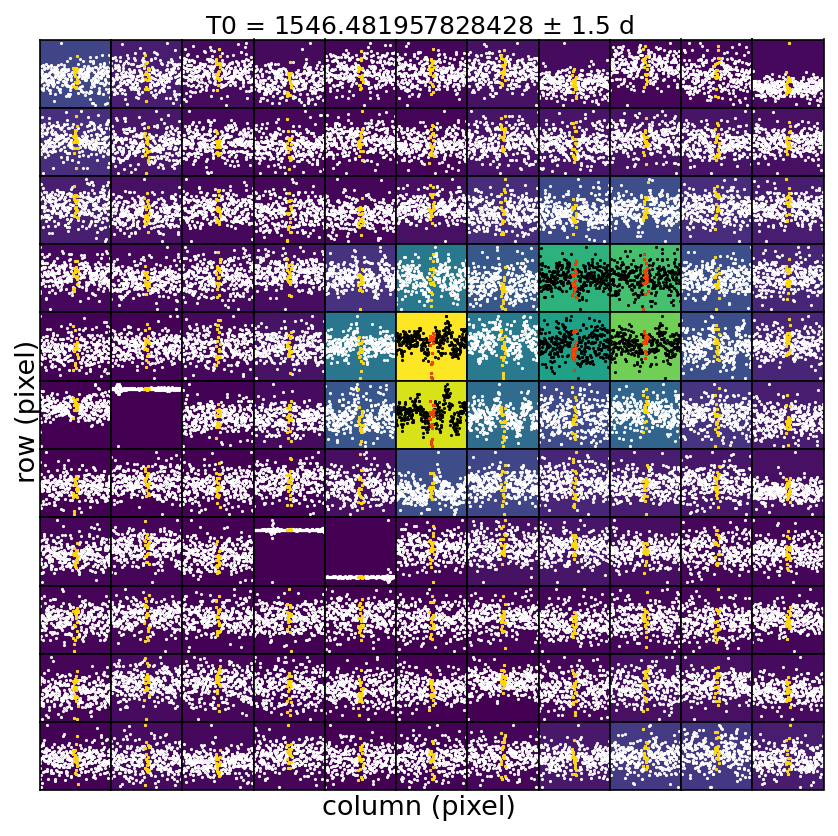

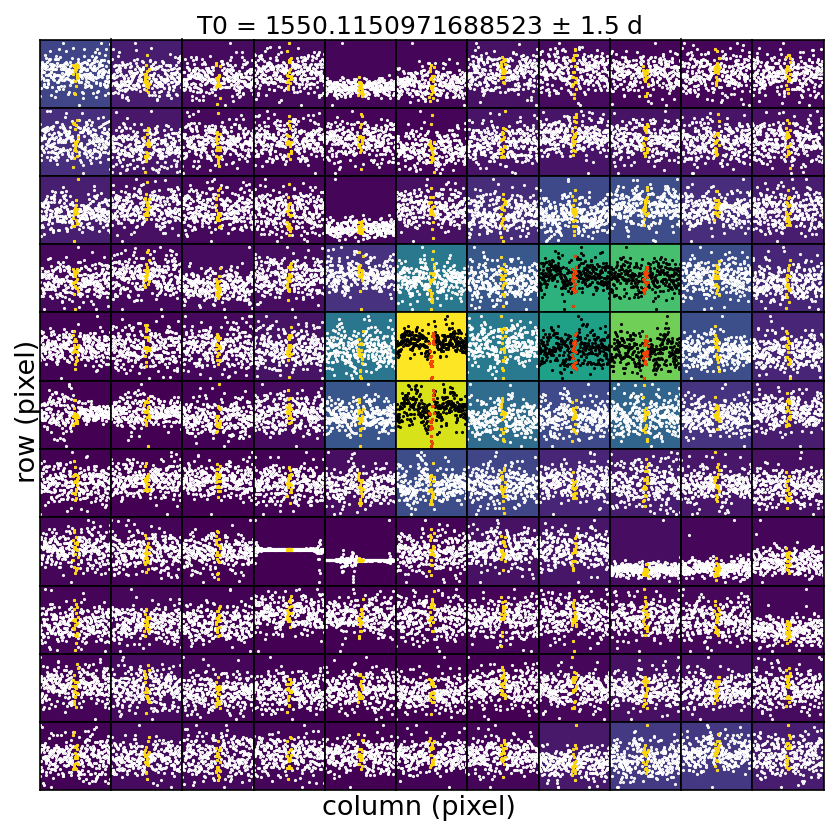

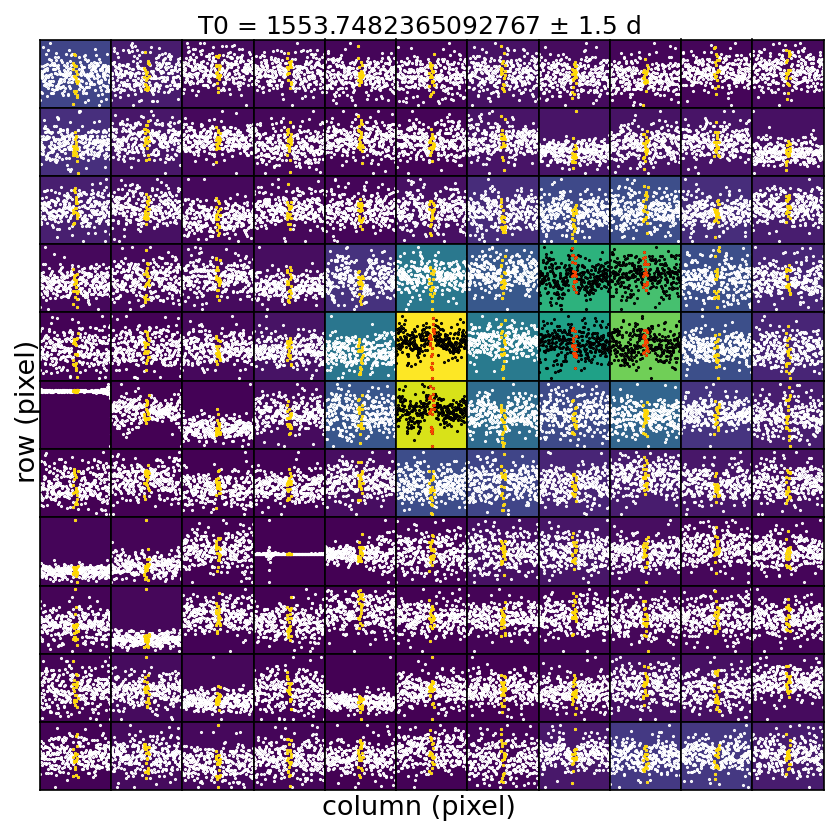

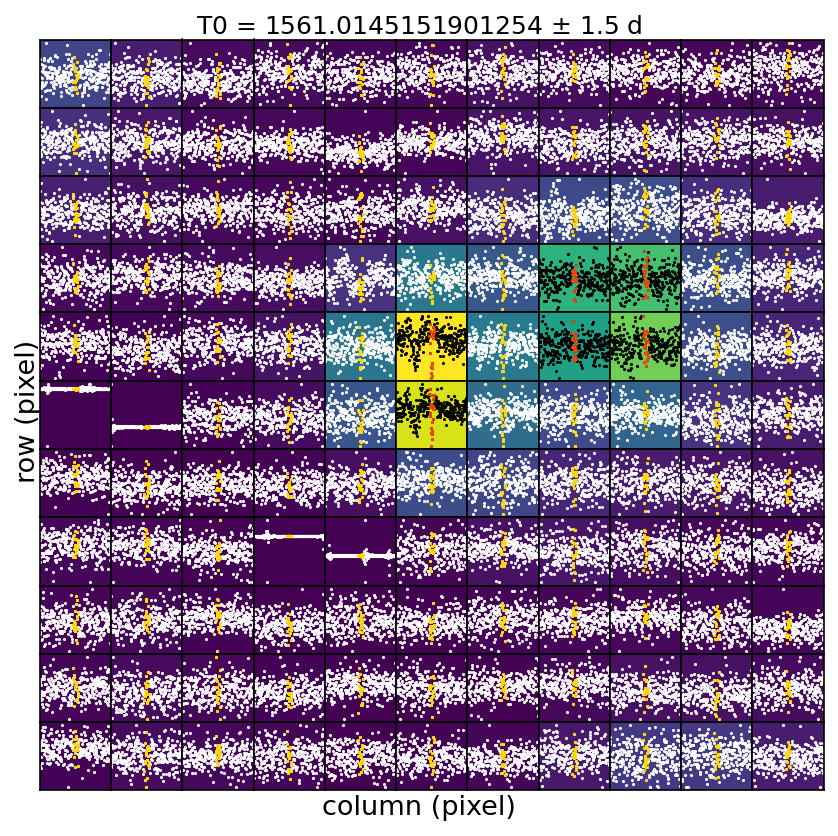

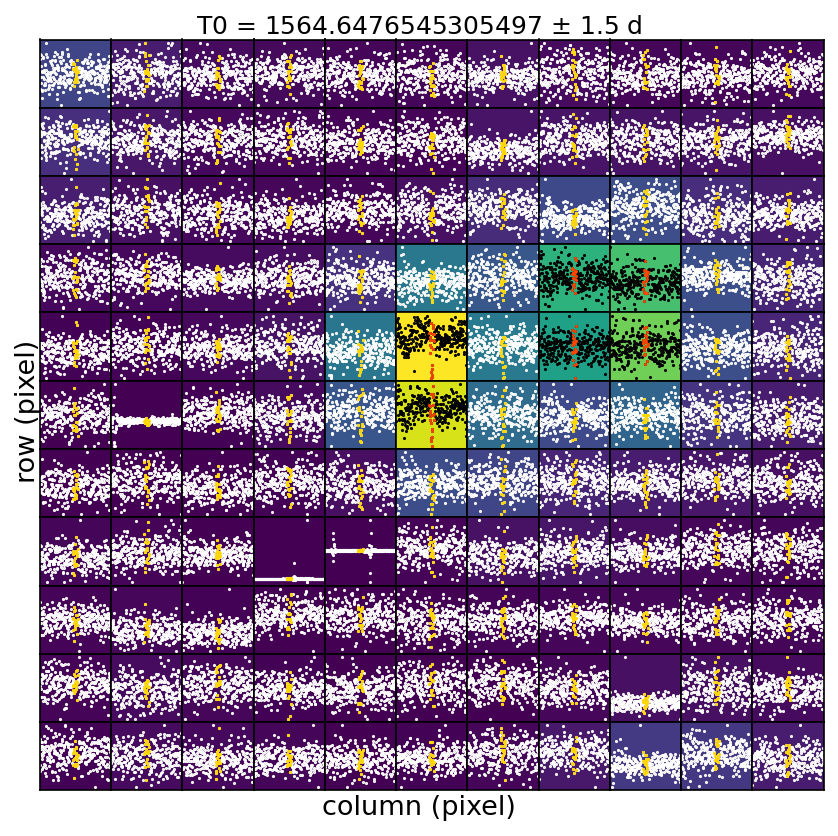

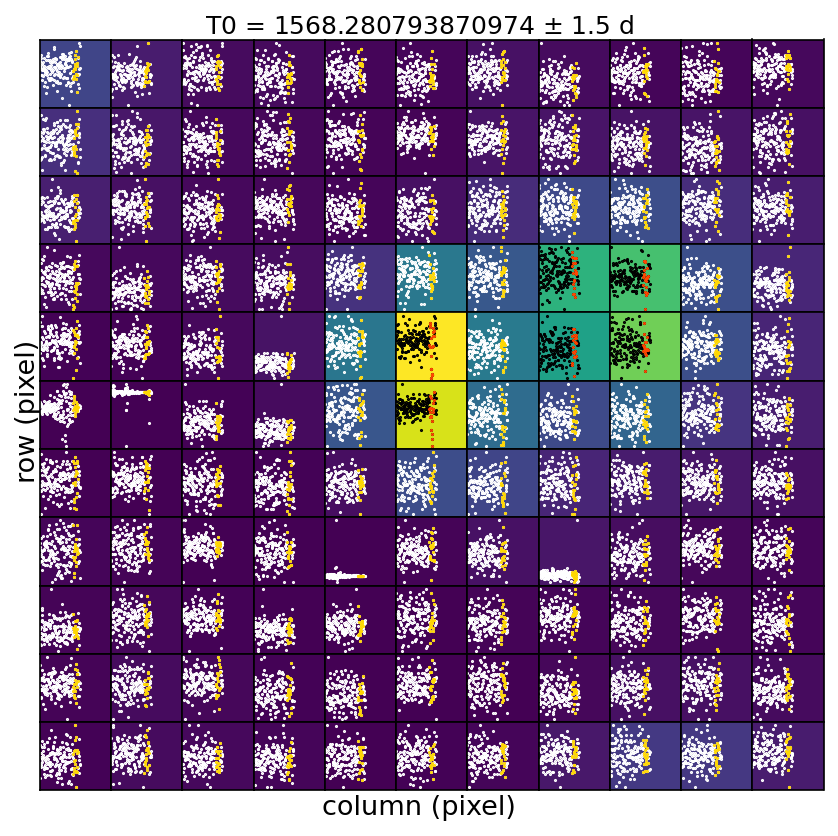

In [21]:
for i in range(np.size(transit_time)):
    pll.plot_pixel_level_LC(TOI_ID, Sector, tpf, transit_time[i], i)

# TEST 3: In Out Transit Flux

In [56]:
def plot_in_out_TPF(tpf,  T0):

    tpf_list = [tpf.flux.value]
    t_list = [tpf.time.value]
    T0_list = [T0]
    
    plt.figure(figsize=(9,2.5*len(T0_list)))

    plt.tight_layout()

    count = 0 # keep track of how many images have been plotted to that they appear on a subgrid of plots which has three columns

    # loop through all of the list of PCA corrected flux vs time arrays for each marked transit-event
    for idx, tpf_filt in enumerate(tpf_list): # idx is for each maked transit-event

        T0 = T0_list[idx] # the time of the transit-like event
        t = t_list[idx] # the time array

        intr = abs(T0-t) < 0.036  # create a mask of the in transit times
        oot = (abs(T0-t) < 0.5) * (abs(T0-t) > 0.036)  # create a mask of the out of transit times
        img_intr = tpf_filt[intr,:,:].sum(axis=0)/float(intr.sum()) # apply the masks and normalize the flux
        img_oot = tpf_filt[oot,:,:].sum(axis=0)/float(oot.sum())
        img_diff = img_oot-img_intr # calculate the diffefence image (out of transit minus in-transit)

        
        # ---- PLOT -------

        # in transit
        count += 1 # add to the count before each plot
        plt.subplot(len(T0_list), 3, count)
        plt.axis('off')
        plt.imshow(img_intr, cmap=plt.cm.viridis, origin = 'lower')
        plt.colorbar()
        plt.title("t = {} days \n In Transit Flux (e-/candence)".format(T0), fontsize = 9 )

        # out of transit
        count += 1
        plt.subplot(len(T0_list), 3, count)
        plt.axis('off')
        plt.imshow(img_oot, cmap=plt.cm.viridis, origin = 'lower')
        plt.colorbar()
        plt.title("Out of Transit Flux (e-/candence)", fontsize = 9 )

        # out of transit minus in-transit
        count += 1
        plt.subplot(len(T0_list), 3, count)
        plt.axis('off')
        plt.imshow(img_diff, cmap=plt.cm.viridis, origin = 'lower')
        plt.colorbar()
        plt.title("Difference Flux (e-/candence)", fontsize = 9 )


    plt.subplots_adjust(wspace = 0)
    plt.tight_layout()

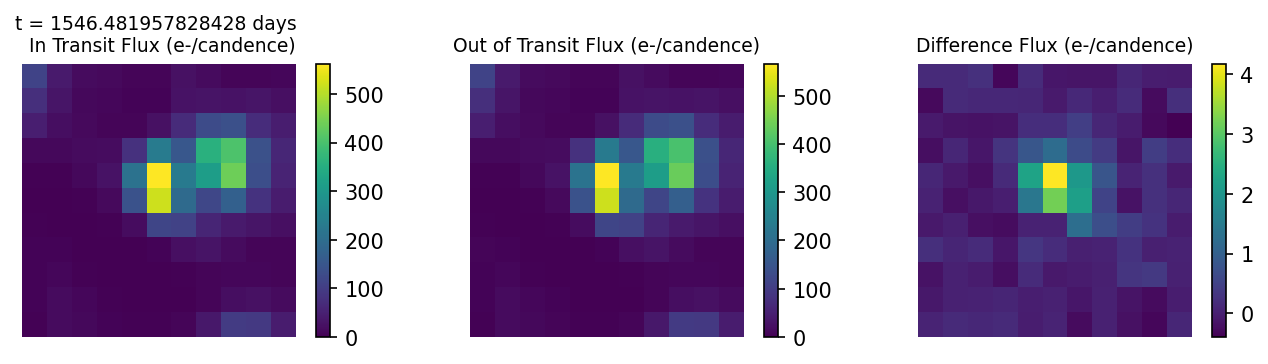

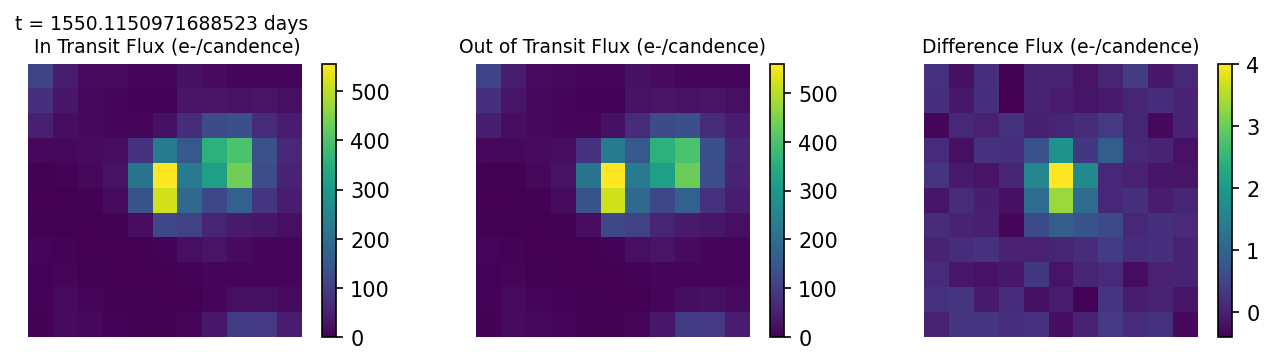

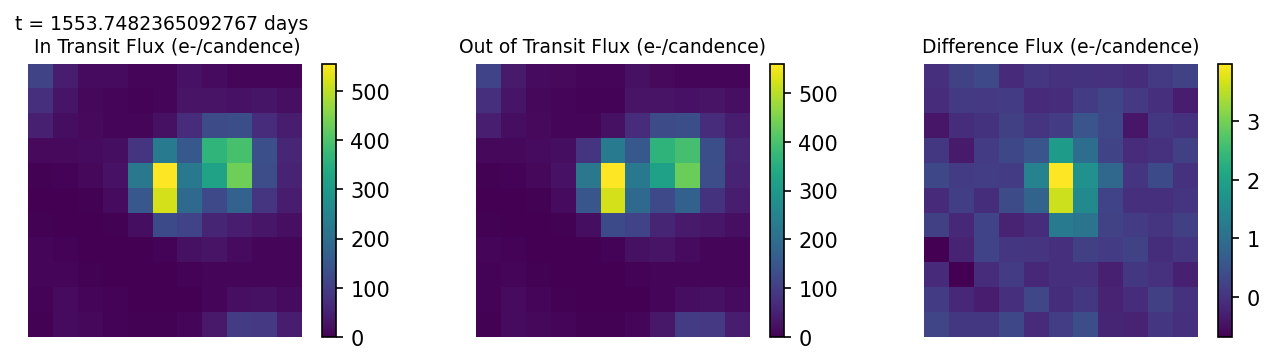

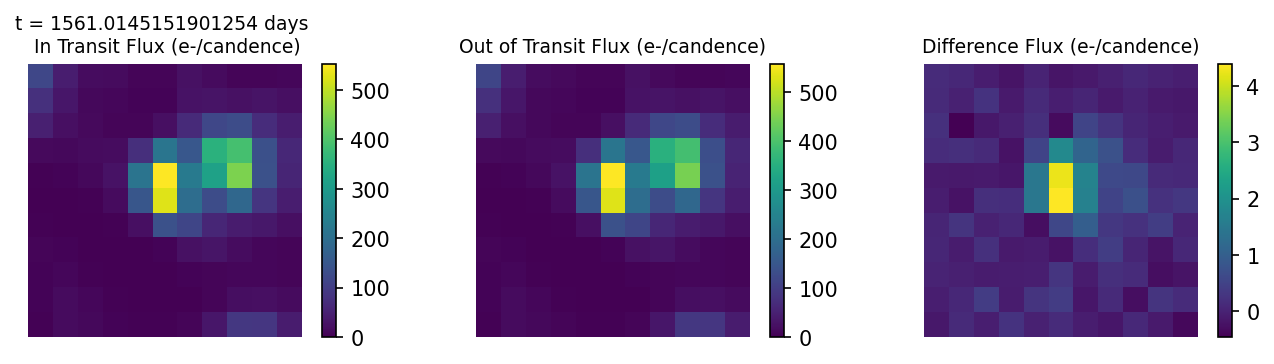

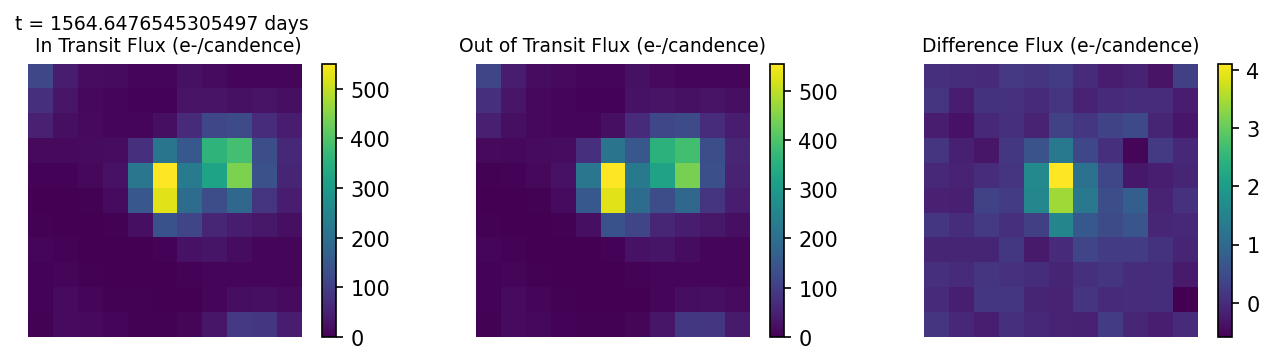

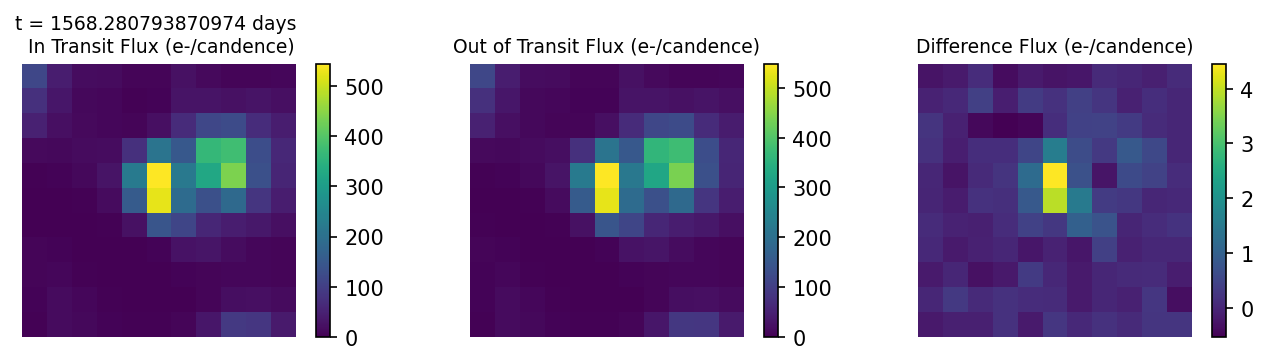

In [59]:
for i in range(np.size(transit_time)):
    plot_in_out_TPF(tpf, transit_time[i])

# TEST 4: Centriod Position

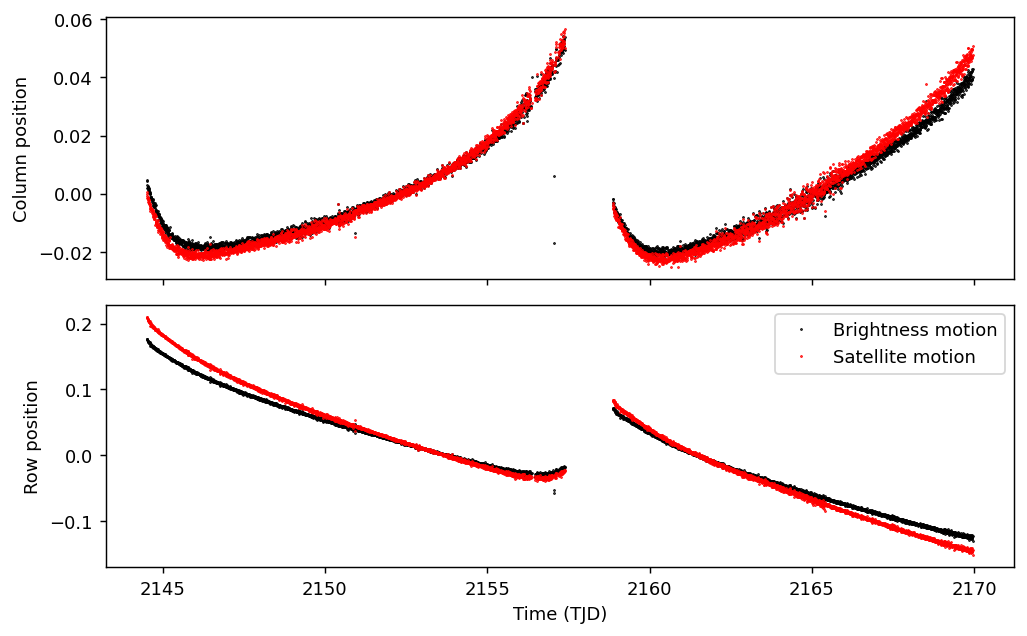

In [11]:
# bin the data
lc_bin = lc.bin(7/60/24)

# set up the plotting region
fig, ax = plt.subplots(2,1, figsize = (8,5), sharex= True)

# plot the two different centroid motions in the column and row positions
ax[0].plot(lc_bin.time.value, lc_bin.mom_centr1.value-np.nanmean(lc_bin.mom_centr1.value), color = 'black', lw = 0, marker = '.', ms = 1)
ax[0].plot(lc_bin.time.value, lc_bin.pos_corr1.value-np.nanmean(lc_bin.pos_corr1.value), color = 'red', lw = 0, marker = '.', ms = 1)

ax[1].plot(lc_bin.time.value, lc_bin.mom_centr2.value - np.nanmedian(lc_bin.mom_centr2.value), color = 'black', lw = 0, marker = '.', ms = 1, label = 'Brightness motion')
ax[1].plot(lc_bin.time.value, lc_bin.pos_corr2.value- np.nanmedian(lc_bin.pos_corr2.value), color = 'red', lw = 0, marker = '.', ms = 1, label = 'Satellite motion')

# define the axis labels
ax[0].set_ylabel("Column position")
ax[1].set_ylabel("Row position")
plt.xlabel("Time (TJD)")
plt.legend()
plt.tight_layout()
plt.show()

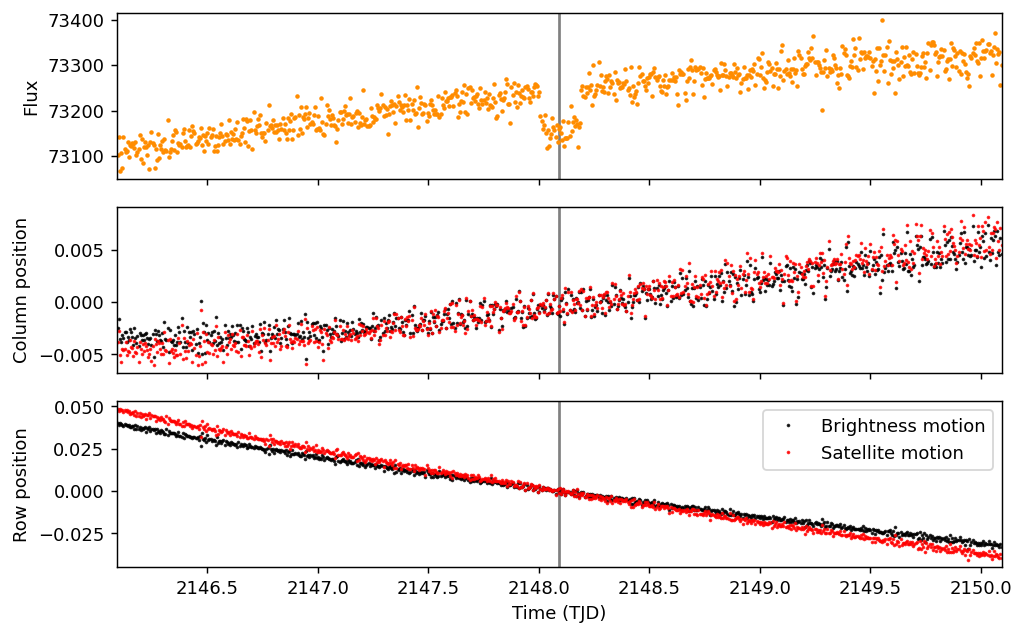

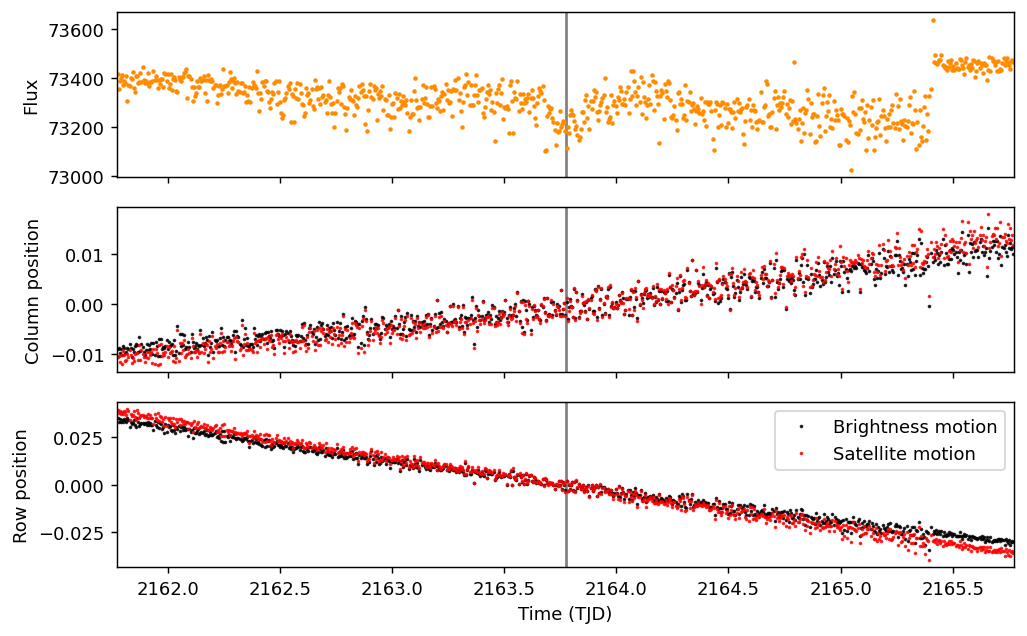

In [12]:
 window = 2 # let's look at the one days surrounding the target 

for i in range(np.size(transit_time)):
    cp.plot_centroids(lc, transit_time[i], window=window, i = i)